In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

D:\Deep\Code\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
count = 0
dirs = os.listdir(r'D:\Deep\Code\Data_Flowers')

for dir in dirs:
    files = os.listdir(r'D:\Deep\Code\Data_Flowers\\' + dir)
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count += len(files)

print('Total has ' + str(count) + ' Images')

daisy Folder has 765 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Total has 4318 Images


In [4]:
base_dir = r'D:\Deep\Code\Data_Flowers'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [6]:
flower_names = train_ds.class_names
print(flower_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


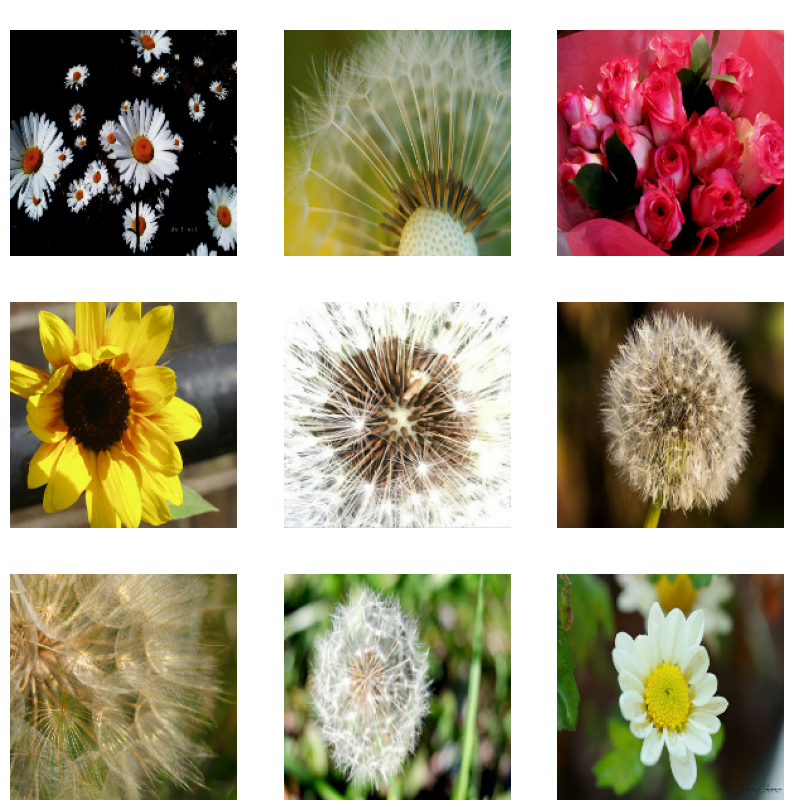

In [8]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10), facecolor='white')

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i].numpy()])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

D:\Deep\Code\.venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


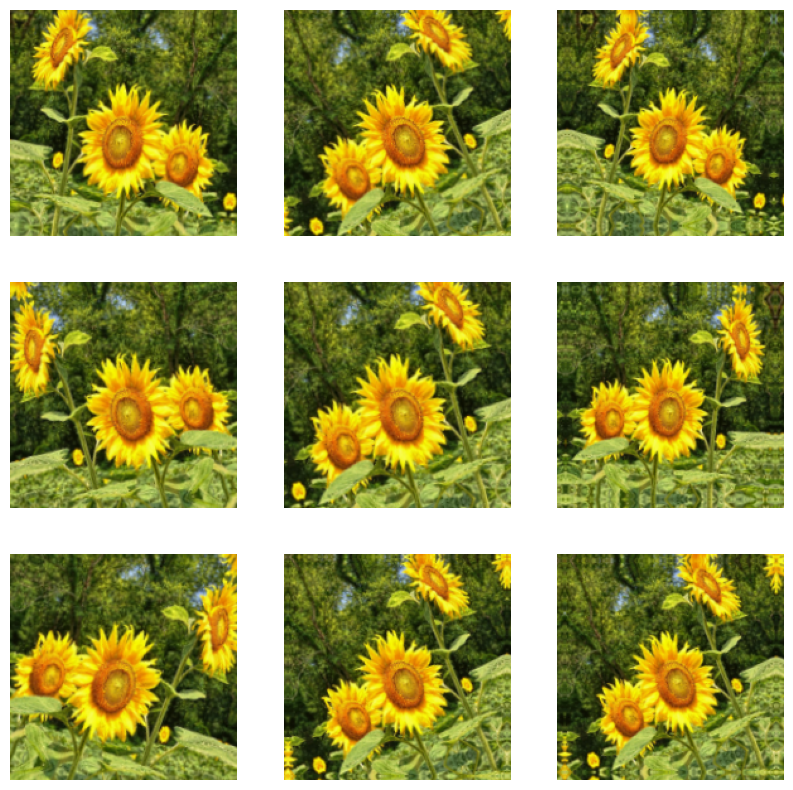

In [13]:
plt.figure(figsize=(10,10), facecolor='white')

for images, labels in train_ds.take(1):
    image = images[0]
    for i in range(9):
        images = data_augmentation(tf.expand_dims(image, 0))
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [14]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step - accuracy: 0.4424 - loss: 1.2934 - val_accuracy: 0.4693 - val_loss: 1.2118
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.5871 - loss: 1.0503 - val_accuracy: 0.6269 - val_loss: 0.9679
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.6257 - loss: 0.9453 - val_accuracy: 0.6443 - val_loss: 0.9258
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.6563 - loss: 0.8812 - val_accuracy: 0.6269 - val_loss: 1.0131
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.6754 - loss: 0.8365 - val_accuracy: 0.6686 - val_loss: 0.8655
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.6885 - loss: 0.7933 - val_accuracy: 0.6674 - val_loss: 0.8936
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.7070 - loss: 0.7600 - val_accuracy: 0.6732 - val_loss: 0.9011
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.7154 - loss: 0

In [18]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    # input_image_array = input_image_array / 255.0
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = ('The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100))
    return outcome

In [24]:
classify_images(r'D:\Deep\Code\Data_Flowers\tulip\11746367_d23a35b085_n.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'The Image belongs to tulip with a score of 99.92288'

In [28]:
model.save('Flower_CNN_Model_End.keras')

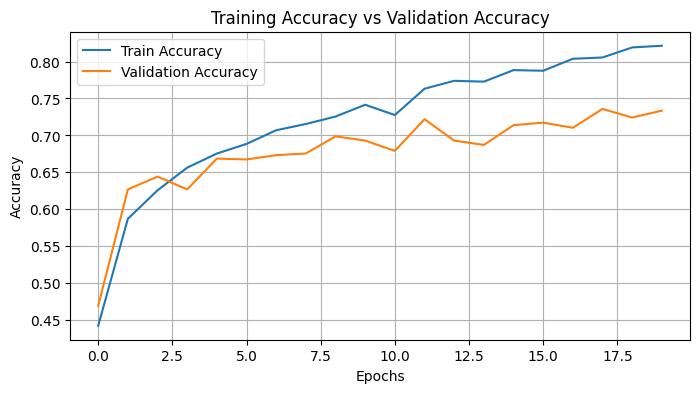

In [35]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

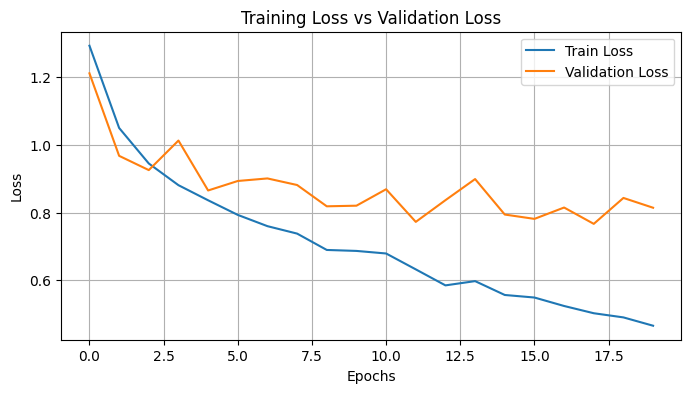

In [36]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

<Figure size 800x600 with 0 Axes>

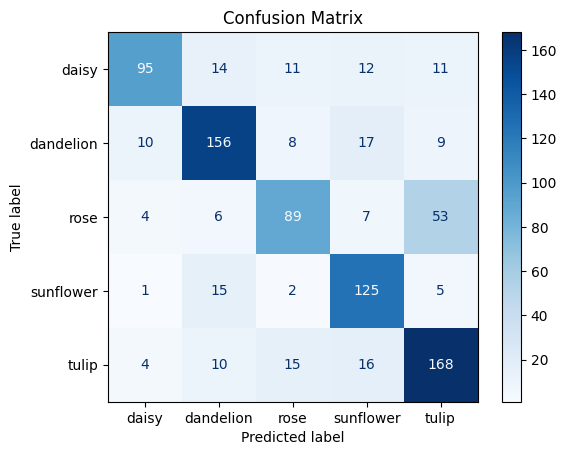

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=flower_names)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=flower_names
))


              precision    recall  f1-score   support

       daisy       0.83      0.66      0.74       143
   dandelion       0.78      0.78      0.78       200
        rose       0.71      0.56      0.63       159
   sunflower       0.71      0.84      0.77       148
       tulip       0.68      0.79      0.73       213

    accuracy                           0.73       863
   macro avg       0.74      0.73      0.73       863
weighted avg       0.74      0.73      0.73       863

